## Time Series EDA
- Single continuous variable over (uniformly distributed) time
- Understand temporal behavior of data: trend and seasonality, cycle
- Identify underlying distribution and nature of temporal processes producing data

#### Setup
°F = (K - 273.15) x 1.8000 + 32.00

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

NumExpr defaulting to 8 threads.


Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


In [4]:
df.head(12)

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652
2012-10-01 22:00:00,61.578379


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45252 entries, 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    45252 non-null  float64
dtypes: float64(1)
memory usage: 707.1 KB


In [5]:
df.isna().sum()

temp    0
dtype: int64

In [8]:
df.describe()

,temp
count,45252.000000
mean,69.144163
std,14.946638
min,17.420000
25%,59.810000
50%,71.661650
75%,79.412000
max,104.918000


- **Seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality  
    - Quite common in economic time series. It is less common in engineering and scientific data.
    - Can help us understand underlying dynamics


- **Trend**: long term upwards or downwards movement  
- **Cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Split your data before exploration (if you are going to do modeling)

## Visualizations

In [9]:
# look at the head of df
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [10]:
# create a series called 'y'

y = df.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

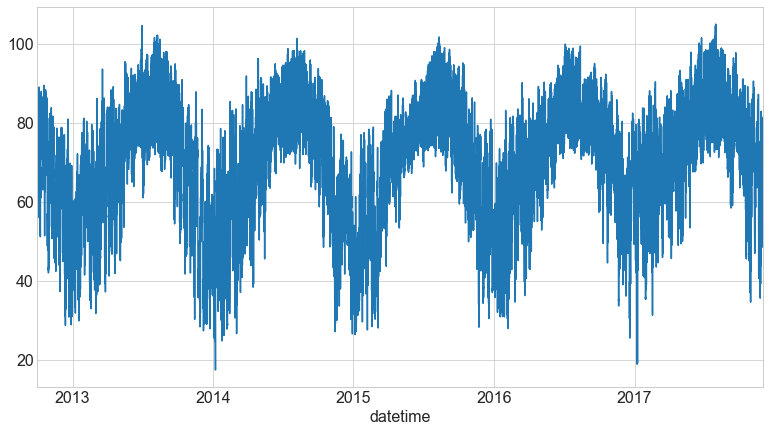

In [11]:
y.plot();

Re-sampling at a longer frequency "smooths" the line

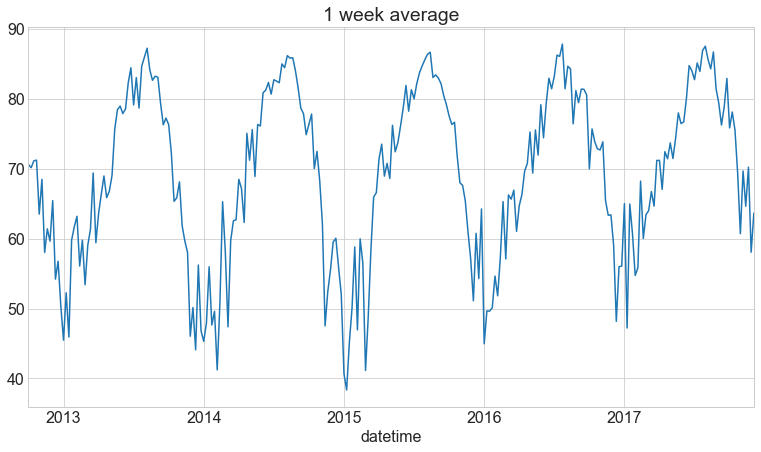

In [13]:
y.resample('W').mean().plot(title='1 week average');

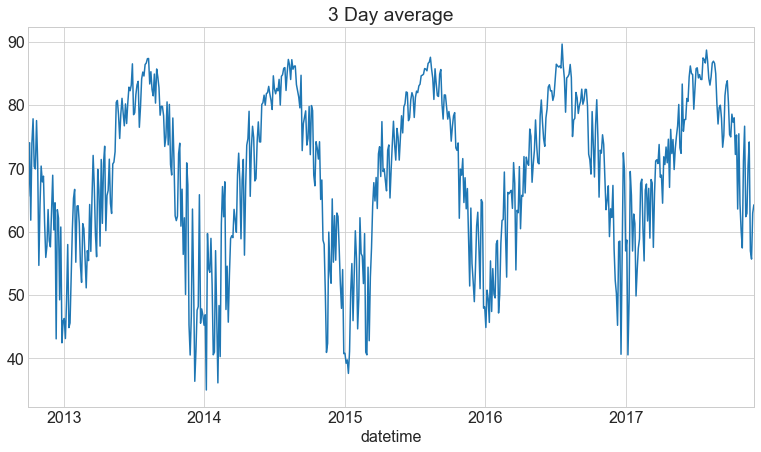

In [15]:
y.resample('3D').mean().plot(title='3 Day average');

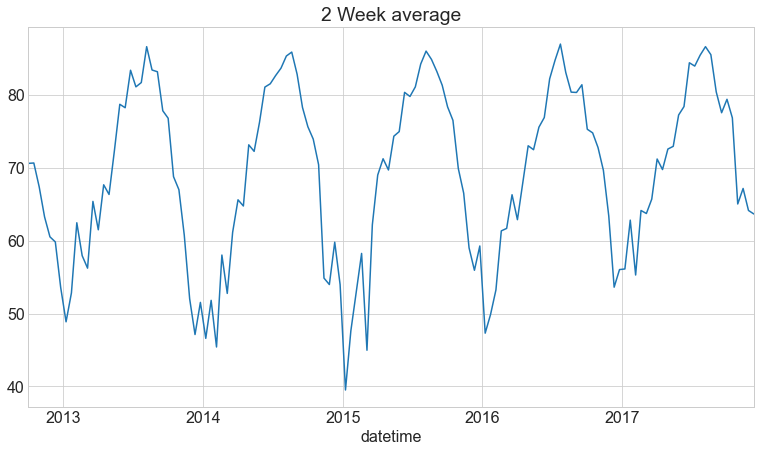

In [16]:
y.resample('2W').mean().plot(title='2 Week average');

We can combine multiple resampling periods on a single viz:

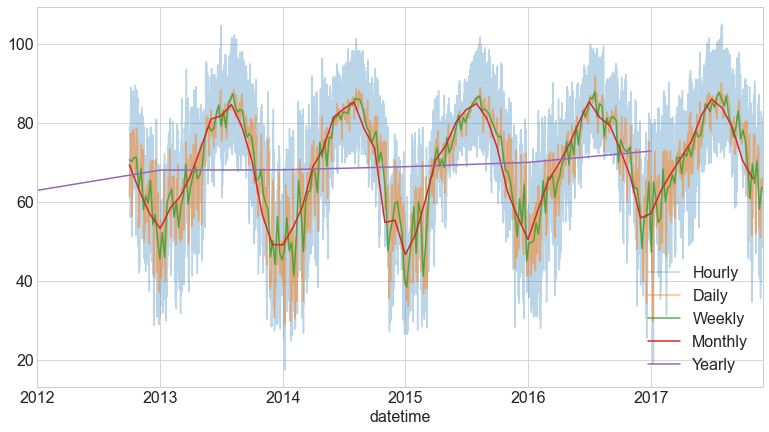

In [17]:
ax = y.plot(alpha=.3, label='Hourly')
y.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
y.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
y.resample('M').mean().plot(ax=ax, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

### Treat date components as categorical variables


<div class="alert alert-info">
    <p><strong>Aside: Month and Weekday Ordering</strong></p>
    <p>By default, matplotlib/pandas will sort months and weekdays alphabetically, which is usually not what we want.</p>
    <p>There are several ways to work around this:</p>
    <ul>
        <li>Just use the month (1-12) number or weekday number (1-7)</li>
        <li>Instead of using just the month or weekday, use a leading number and then the name (e.g. 1-Jan, 2-Feb)</li>
        <li>Use a combination of the techniques above, and then re-index the resulting pandas object with more human friendly names</li>
        <li>Use a combination of the techniques above, and then manually adjust the labels with matplotlib</li>
    </ul>
</div>

#### Visualize by month


In [ ]:
# make an new column 'month'
df['month'] = df.index.month

In [ ]:
# Plot mean temperature by month (bar plot)
# y.groupby(y.index.month).mean().plot.bar()
df.groupby(df.index.strftime('%m-%b')).temp.mean().plot.bar()

#### What if we want to visualize more than just the mean temperature?

In [ ]:
df.groupby('month').describe()

In [ ]:
# boxplot for each month
sns.boxplot(data = df, x = 'month', y = 'temp')

- more variation in temps in fall/winter
- less variation in temps in summer months

### Moving averages

In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=8, label='30 days')
plt.legend()

**Differences**

`.diff` let's us take the difference between the current and previous value.


In [ ]:
y.resample('W').mean().diff()

In [ ]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature');

- Higher weekly temp swings in fall and winter months 

In [ ]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature');

### Seasonal Plot
- comparison of multiple years together.

In [ ]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Seasonal Subseries Plot
A seasonal subseries plot shows the change year-over-year within each month.

In [ ]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

In [ ]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

### What if seasonality is not that readily apparent?

Is there a seasonality in this data?

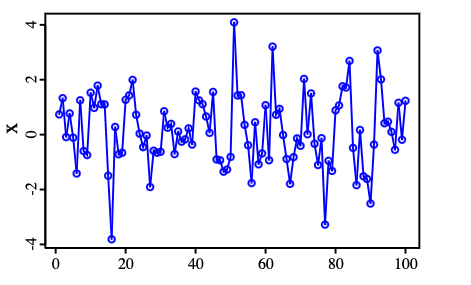

### Lag plot

In [ ]:
y.shift(-1)

In [ ]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

In [ ]:
daily = df.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [ ]:
weekly = df.resample('W').mean()
weekly['1_weeks_out'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.head()

In [ ]:
weekly.plot.scatter(x='this_week', y='1_weeks_out')

In [ ]:
# weekly = df.resample('W').mean()
# weekly['12_weeks_out'] = weekly.temp.shift(-12)
# weekly = weekly.rename(columns={'temp': 'this_week'})
# weekly.plot.scatter(x='this_week', y='12_weeks_out')
# weekly.head()

In [ ]:
weekly = df.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly.head()

In [ ]:
# easier way. Use pd.plotting.lag_plot(series, lag):

pd.plotting.lag_plot(df.temp.resample('W').mean(), lag=26)

### Autocorrelation Plot

In [ ]:
pd.plotting.autocorrelation_plot(df.temp.resample('W').mean())

### What does autocorrelation plot look like for white noise

In [ ]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

In [ ]:
#plot the autocorrelation for noise

pd.plotting.autocorrelation_plot(noise)

### Another example of Autocorrelation

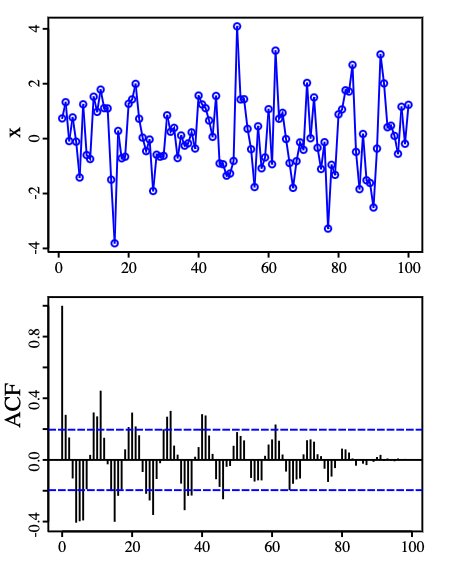

#### Visuals seasonal subseries plot and the box plot assume that the seasonal periods are known. However, if the seasonality period is not readlity apparent , the autocorrelation plot can help. 
#### If there is significant seasonality, the autocorrelation plot should show spikes at lags equal to the period.

### Seasonal Decomposition

$$ y = S + T + \epsilon $$

### data = Seasonality + Trend + Residual

In [ ]:
y = df.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [ ]:
# we can access different attributes of object created above (e.g. seasonal, trend and resid)
result.seasonal

In [ ]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

In [ ]:
decomposition.iloc[:, 1:].plot()

In [ ]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?


The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. 


https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

Effectively, with multiplicative seasonality the width of the seasonal pattern is proportional to the level. For additive seasonality it is independent.

### Categories over time

In [ ]:
df = df.resample('D').mean()
df.head()

In [ ]:
# create a categorical feature
df['temp_bin'] = pd.qcut(df.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
df.groupby('temp_bin').temp.mean()

In [ ]:
df.head()

How can we visualize the temp_bin feature over time?

In [ ]:
ax = (df['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

##### another chart I saw recently
https://coronavirus.health.ny.gov/covid-19-variant-data

### strftime

In [ ]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);

### Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

In [ ]:
# how can i customize the x axis label here?

y.resample('W').mean().plot()
plt.xticks();

In [ ]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))